In [1]:
import numpy as np
import pandas as pd
import json
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Load Experiment Results
extracted_data = []

with open("../../results.jsonl") as file:
    for line in tqdm(file):
        data = json.loads(line)
        
        extracted_data.append({
            'mp_id': data['mp_id'],
            'model': data['model'],
            'partitioner' : data['partitioner'],
            'core_partition_sizes': [len(x) for x in data['core']],
            'ext_partition_sizes': [len(x) for x in data['extended']],
            'num_atoms': sum(len(x) for x in data['core']),
            'time': data['time']
        })
        
df = pd.DataFrame(extracted_data)

665it [03:56,  2.82it/s]


## Timing: METIS Cython vs METIS Wrapper

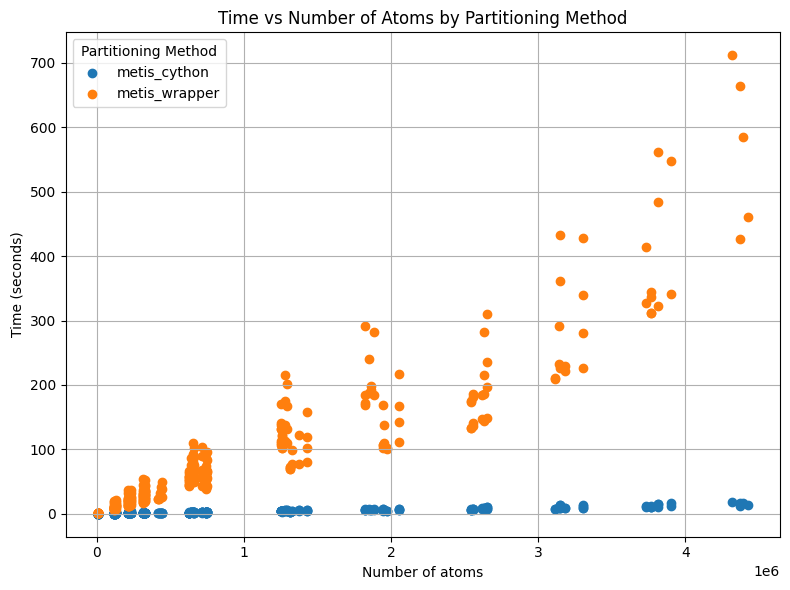

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for label, group in df.groupby('partitioner'):
    ax.scatter(group['num_atoms'], group['time'], label=label)

ax.grid(True)
ax.legend(title="Partitioning Method")

plt.title("Time vs Number of Atoms by Partitioning Method")
plt.xlabel("Number of atoms")
plt.ylabel("Time (seconds)")
plt.tight_layout()
plt.show()

## Efficiency: Extended Partition Ratio by Partitioning Method

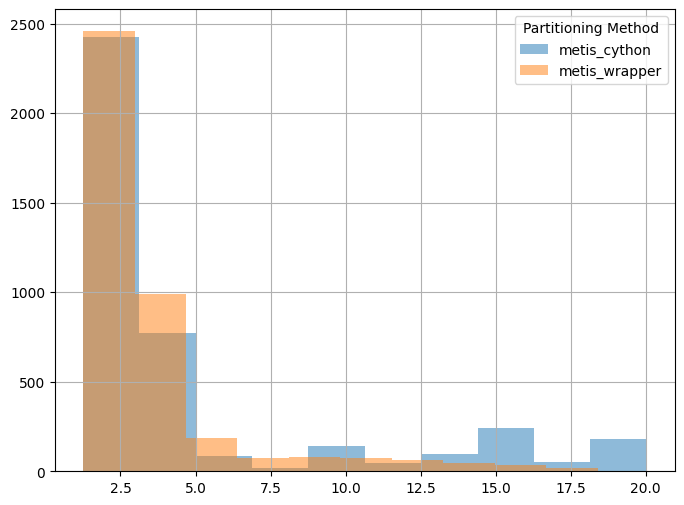

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

df_exploded = df.explode(['ext_partition_sizes', 'core_partition_sizes'])
df_exploded['ext_ratio'] = df_exploded['ext_partition_sizes'] / df_exploded['core_partition_sizes']

for label, group in df_exploded.groupby('partitioner'):
    ax.hist(
        group['ext_ratio'],
        label=label,
        alpha=0.5
    )

ax.legend(title="Partitioning Method")
ax.grid(True)
plt.show()